# Chart Busters Participants Prediction

Hackathon link : https://www.machinehack.com/course/chartbusters-prediction-foretell-the-popularity-of-songs/

<img src="./images/Music.jpg" height='400px' width='100%'><br/>





## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Importing Packages](#section2)<br>
3. [Loading Data](#section3)<br>
  - 3.1 [Description of the Datasets](#section301)<br>
  - 3.2 [Pandas Profiling before Data Preprocessing](#section302)<br>
4. [Data Preprocessing](#section4)<br>
  - 4.1 [Filling missing values](#section401)<br>
  - 4.2 [Remove highly correlated columns](#section402)<br>
  - 4.3 [Handling Outliers](#section403)<br>
  - 4.4 [Pandas Profiling after Data Preprocessing](#section404)<br>
  - 4.5 [Exploratory Data Analysis](#section405)<br>
5. [Data preparation for model building](#section5)<br>
  - 5.1 [Dummification / One-Hot Encoding](#section501)<br>
  - 5.2 [Standardizing continuos independent variables](#section502)<br>
  - 5.3 [Segregating Train and Test data](#section503)<br>
6. [Ensemble Modelling and Prediction](#section6)<br>  
  - 6.1 [Linear Regression](#section601)
      - 6.1.1 [Checking assumptions of Linear Regression](#section60101)
      - 6.1.2 [Using Default Model](#section60102)
          - 6.1.2.1 [Building Model and Predictionl](#section6010201)
          - 6.1.2.2 [Model Evaluation](#section6010202)
      - 6.1.3 [Using GridSearchCV](#section60103)
          - 6.1.2.1 [Building Model and Predictionl](#section6010301)
          - 6.1.2.2 [Model Evaluation](#section6010301)
       - 6.1.4 [Using RandomSearchCV](#section60104)
          - 6.1.2.1 [Building Model and Predictionl](#section6010401)
          - 6.1.2.2 [Model Evaluation](#section6010401)
  - 6.2 [Decision Tree](#section602)
      - 6.2.1 [Using Default Model](#section60201)
          - 6.2.1.1 [Building Model and Predictionl](#section6020101)
          - 6.2.1.2 [Model Evaluation](#section6020102)
      - 6.2.2 [Using GridSearchCV](#section60202)
          - 6.2.2.1 [Building Model and Predictionl](#section6020201)
          - 6.2.2.2 [Model Evaluation](#section6020202)
      - 6.2.3 [Using RandomSearchCV](#section60203)
          - 6.2.3.1 [Building Model and Predictionl](#section6020301)
          - 6.2.3.2 [Model Evaluation](#section6020302)
  - 6.3 [Random Forest](#section603)
      - 6.3.1 [Using Default Model](#section60301)
          - 6.3.1.1 [Building Model and Predictionl](#section6030101)
          - 6.1.2.2 [Model Evaluation](#section6030102)
      - 6.3.2 [Using GridSearchCV](#section60302)
          - 6.3.2.1 [Building Model and Predictionl](#section6030201)
          - 6.3.2.2 [Model Evaluation](#section6030202)
      - 6.3.3 [Using RandomSearchCV](#section60303)
          - 6.3.3.1 [Building Model and Predictionl](#section6030301)
          - 6.3.3.2 [Model Evaluation](#section6030302)
7.  [Conclusion](#section7)<br>
    - 7.1 [Choosing Best Model for Prediction](#section701)
    - 7.2 [Final Prediction](#section702)

<a id=section1></a>
# 1. Problem Statement


<img src="./images/ChartbustersPrediction.jpg" height='400px' width='100%'><br/>

One of our customers strongly believes in technology and has recently backed up its platform using Machine Learning and Artificial Intelligence. Based on data collected from multiple sources on different songs and various artist attributes our customer is excited to challenge the MachineHack community.

By analyzing the chartbusters data to predict the Views of songs, MachineHackers would advance the state of the current platform. This can help our customer understand user behaviour and personalize the user experience. 
In this hackathon, we challenge the MachineHackers to come up with a prediction algorithm that can predict the views for a given song.

Can you predict how popular a song will be in the future?

<a id=section2></a>
# 2. Importing Packages

In [2]:
import numpy as np                     

import pandas as pd

# To suppress pandas warnings.
pd.set_option('mode.chained_assignment', None) 

# To display all the data in each column
pd.set_option('display.max_colwidth', -1)         

pd.get_option("display.max_rows",10000)

# To display every column of the dataset in head()
pd.options.display.max_columns = 100               

import warnings
warnings.filterwarnings('ignore')     

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

# To apply seaborn styles to the plots.
import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      

<a id=section3></a>

# 3. Loading Data

In [5]:
# loading data from csv file to a data frame
df_train = pd.read_csv('./data/Data_Train.csv', index_col = "Unique_ID")

# Adding new column 'isTestData' so that we can easily separate train and test 
# data during prediction process
df_train['Is_Test_Data'] = 0

df_test = pd.read_csv('./data/Data_Test.csv', index_col = "Unique_ID")

df_test['Is_Test_Data'] = 1

# concat train and test data for data pre processing
df_views_songs = pd.concat([df_train,df_test])

df_views_songs.head()

,Comments,Country,Followers,Genre,Is_Test_Data,Likes,Name,Popularity,Song_Name,Timestamp,Views
Unique_ID,,,,,,,,,,,
413890,4,AU,119563,danceedm,0,499,Hardstyle,97,N-Vitral presents BOMBSQUAD - Poison Spitter (Snakepit 2018 Anthem),2018-03-30 15:24:45.000000,14017.0
249453,17,AU,2141,danceedm,0,49,Dj Aladdin,17,Dj Aladdin - Old School Hip Hop Quick Mix,2016-06-20 05:58:52.000000,1918.0
681116,11,AU,22248,danceedm,0,312,Maxximize On Air,91,Maxximize On Air - Mixed by Blasterjaxx - Episode #048,2015-05-08 17:45:59.000000,9668.0
387253,2,AU,393655,rbsoul,0,"2,400",GR6 EXPLODE,76,MC Yago - Tenho Compromisso (DJ R7),2017-06-08 23:50:03.000000,113036.0
1428029,81,AU,201030,danceedm,0,"3,031",Tritonal,699,Escape (feat. Steph Jones),2016-09-17 20:50:19.000000,110024.0


<a id=section301></a>
## 3.1 Description of the Datasets

#### a. Check shape

In [ ]:
#shape of data
df_views_songs.shape

#### b. info

**Unique_ID** : Unique Identifier.

**Name** : Name of the Artist.

**Genre** : Genre of the Song.

**Country** : Origin Country of Artist.

**Song_Name** : Name of the Song.

**Timestamp** : Release Date and Time.

**Views** : Number of times the song was played/viewed (*Target/Dependent Variable*).

**Comments** : Count of comments for the song.

**Likes** : Count of Likes.

**Popularity** : Popularity score for the artist.

**Followers** : Number of Followers.




In [ ]:
df_views_songs.info()

**Observations :**  
We don't have any missing values

#### c. describe

In [ ]:
df_views_songs.describe()

**Observations :** Looks like there are some outliers. Let's confirm same from pandas profiling in next step.

 <a id=section302></a>
## 3.2 Pandas Profiling before Data Preprocessing

In [6]:
# To install pandas profiling please run this command.

!pip install folium==0.2.1
!pip install pandas-profiling --upgrade

Requirement already up-to-date: pandas-profiling in /home/raju4789/anaconda3/lib/python3.7/site-packages (2.4.0)


In [ ]:
 import pandas_profiling

# Running pandas profiling to get better understanding of data
df_views_songs.profile_report(title='Pandas Profiling before Data Preprocessing')

 <a id=section4></a>
# 4. Data Preprocessing

 <a id=section401></a>
## 4.1 Fixing datatypes of columns

#### a. Country column has only one value

In [0]:
df_views_songs['Country'].value_counts()

AU    98073
Name: Country, dtype: int64

**NOTE :** We can observe country has only one value i.e AU. Let's drop it.

In [0]:
df_views_songs.drop('Country', axis=1, inplace=True)

#### b. Change Likes column from string to integer

In [0]:
# replacing  , M K with empty string
df_views_songs['Likes'] = df_views_songs['Likes'].str.replace(',', '')
df_views_songs['Likes'] = df_views_songs['Likes'].str.replace('K', '')
df_views_songs['Likes'] = df_views_songs['Likes'].str.replace('M', '')

#converting string to float and then int
df_views_songs['Likes'] = df_views_songs['Likes'].astype('float64').astype('int64')

#### c. Change Popularity column from string to integer

In [0]:
#converting string to int
df_views_songs['Popularity'] = df_views_songs['Likes'].astype('int64')

#### d. Change Timestamp column to pandas datetime

In [0]:
df_views_songs
df_views_songs['Timestamp'] = pd.to_datetime(df_views_songs['Timestamp'])

In [0]:
df_views_songs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98073 entries, 413890 to 415046
Data columns (total 10 columns):
Comments        98073 non-null int64
Followers       98073 non-null int64
Genre           98073 non-null object
Is_Test_Data    98073 non-null int64
Likes           98073 non-null int64
Name            98073 non-null object
Popularity      98073 non-null int64
Song_Name       98072 non-null object
Timestamp       98073 non-null datetime64[ns]
Views           78458 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 8.2+ MB


 <a id=section402></a>
## 4.2 Filling missing values

In [0]:
column_names = list(df_views_songs.columns)
column_names.remove('Views')

In [0]:
columns_to_be_dropped = list()
for i in range(0,len(column_names)):
  if(df_views_songs[column_names[i]].isna().any()):
    
    # calculating missing percentage for each column
    missing_count = sum(df_views_songs[column_names[i]].isna())
    total_count = len(df_views_songs[column_names[i]])
    missing_percent = (missing_count/total_count)*100
  

    # add column name to `columns_to_be_dropped` 
    # if missing percentage is greater than 70
    if(missing_percent >= 70):
      columns_to_be_dropped.append(column_names[i])
    else:

      # checking datatype of each column so that we know 
      # which value to be replaced in missing value(median/mode)
      if(df_views_songs[column_names[i]].dtype == 'object'):
        value_to_be_filled = df_views_songs[column_names[i]].mode()[0]
        df_views_songs[column_names[i]].fillna(value_to_be_filled, inplace=True)
      elif(df_views_songs[column_names[i]].dtype == 'float64' or df_views_songs[column_names[i]].dtype == 'int64'):
         value_to_be_filled = df_views_songs[column_names[i]].median()
         df_views_songs[column_names[i]].fillna(value_to_be_filled, inplace=True)

# droping all columns who have more than 70% missing values
df_views_songs.drop(columns_to_be_dropped, axis=1, inplace=True)

In [0]:
df_views_songs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98073 entries, 413890 to 415046
Data columns (total 10 columns):
Comments        98073 non-null int64
Followers       98073 non-null int64
Genre           98073 non-null object
Is_Test_Data    98073 non-null int64
Likes           98073 non-null int64
Name            98073 non-null object
Popularity      98073 non-null int64
Song_Name       98073 non-null object
Timestamp       98073 non-null datetime64[ns]
Views           78458 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 8.2+ MB


**Observations:**

We don't have any missing values. Good to go.

 <a id=section403></a>
## 4.3 Remove highly correlated columns

In [0]:
# extracting feature columns
feature_cols = list(df_views_songs.columns)
feature_cols.remove('Views')
feature_cols.remove('Is_Test_Data')
feature_cols

['Comments',
 'Followers',
 'Genre',
 'Likes',
 'Name',
 'Popularity',
 'Song_Name',
 'Timestamp']

In [0]:
# extracting highly correlated columns(except target variable) to drop

# Create correlation matrix
corr_matrix = df_views_songs[feature_cols].corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.80
cols_to_drop = [column for column in upper.columns if any(upper[column] > 0.70)]
cols_to_drop

['Popularity']

**Observations :** We have two highly correlated independant columns. Let's drop one.

In [0]:
# lets drop Popularity
df_views_songs.drop('Popularity', axis=1, inplace=True)

 <a id=section404></a>
## 4.4 Handling Outliers

Concept of outliers is only applicable to continuous variables.

NOTE:

1. Remove ouliers if percentage is less than 2%

2. Fill remaining outliers values with median(continuous) or mode(categorical) depending on data.



In [0]:
# storing columns with continuos datatype in 'continuos_cols' 
continuous_columns = []
categorical_columns = []
cols = df_views_songs.columns

for i in range(0,len(cols)):
  if(df_views_songs[cols[i]].dtype != 'object'):
    continuous_columns.append(cols[i])
  else:
    categorical_columns.append(cols[i])

continuous_columns.remove('Timestamp')
continuous_columns.remove('Views')

print(continuous_columns)
print(categorical_columns)

['Comments', 'Followers', 'Is_Test_Data', 'Likes']
['Genre', 'Name', 'Song_Name']


In [0]:
for i in range(0, len(continuous_columns)):
  df_temp = df_views_songs[continuous_columns[i]]
  sorted(df_temp)
  q1, q3= np.percentile(df_temp,[10,90])
  iqr = q3 - q1
  lower_bound = q1 -(1.5 * iqr) 
  upper_bound = q3 +(1.5 * iqr) 
  true_index = df_temp.loc[(df_temp < lower_bound) & \
            (df_temp > upper_bound)].any()

  print(true_index)

False
False
False
False


**Observations:** We don't have any outliers in the data.

 <a id=section405></a>
## 4.5 Pandas Profiling after Data Preprocessing

In [0]:
# Running pandas profiling to get better understanding of data
df_views_songs.profile_report(title='Pandas Profiling after Data Preprocessing', style={'full_width':True})

 <a id=section406></a>
## 4.6 Exploratory Data Analysis

We do EDA to have little more understanding of data which might eventually help in selecting best model for prediction

### 1. Top 10 artists with most views

In [0]:
df_views_songs.groupby('Name')['Views'].sum().sort_values(ascending=False).head(10)

Name
LIL UZI VERT              1.527334e+09
XXXTENTACION              1.314233e+09
Kodak Black               1.152849e+09
Future                    1.141617e+09
☆LiL PEEP☆                8.639321e+08
$UICIDEBOY$               8.624110e+08
octobersveryown           8.605966e+08
A BOOGIE WIT DA HOODIE    8.372475e+08
Trippie Redd             8.366992e+08
Juice WRLD                6.213250e+08
Name: Views, dtype: float64

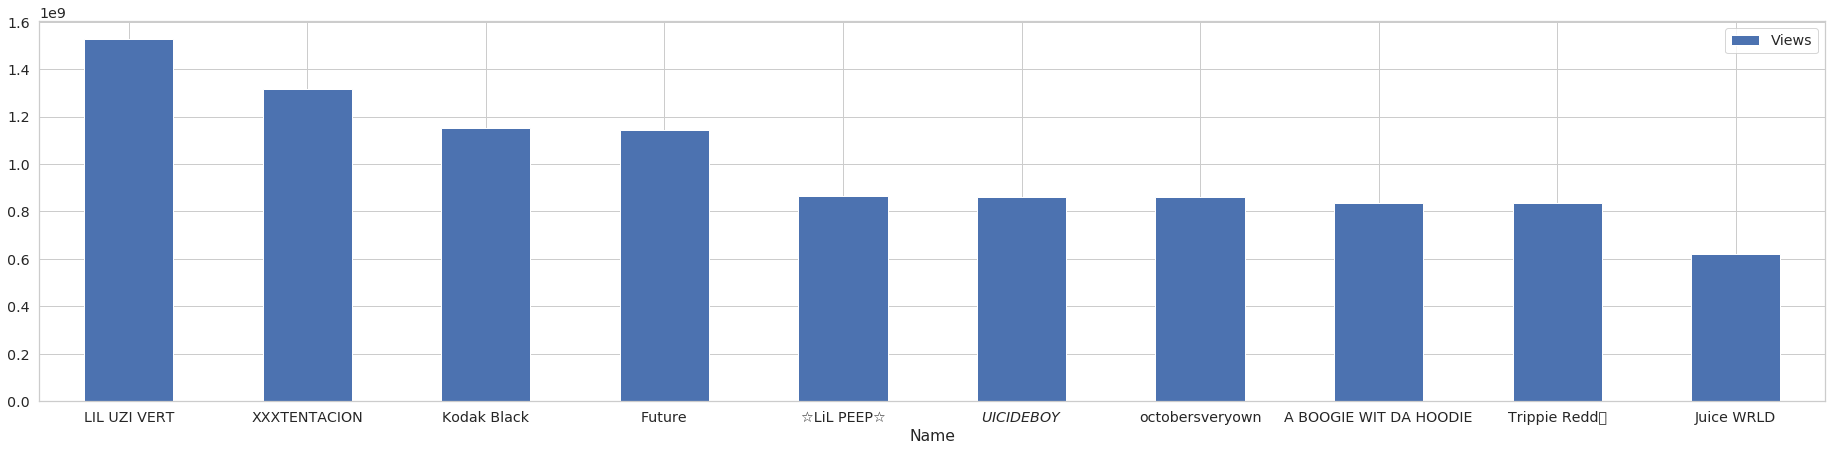

In [0]:
# plotting
df = pd.DataFrame(
	{
    'Views':df_views_songs.groupby('Name')['Views'].sum().sort_values(ascending=False).head(10)
	}
	) 
df.plot.bar(rot=0,figsize=(32, 7))

### 2. Top 10 songs with most views

In [0]:
df_views_songs.groupby('Song_Name')['Views'].sum().sort_values(ascending=False).head(10)

Song_Name
Major Lazer & DJ Snake - Lean On (feat. MØ)               199404980.0
1.5- XO TOUR Llif3 (Produced By TM88)                     195879594.0
Desiigner- "Panda" (Prod. By: Menace)                     183945499.0
Drake ~ Back To Back Freestyle                            163417253.0
rockstar (feat. 21 Savage)                                160900667.0
XXXTENTACION - Look At Me! (Prod. ROJAS & Jimmy Duval)    155167050.0
Lucid Dreams                                              142324998.0
All Of Me                                                 131454078.0
Gucci Gang                                                131053001.0
Drowning (feat. Kodak Black)                              129741188.0
Name: Views, dtype: float64

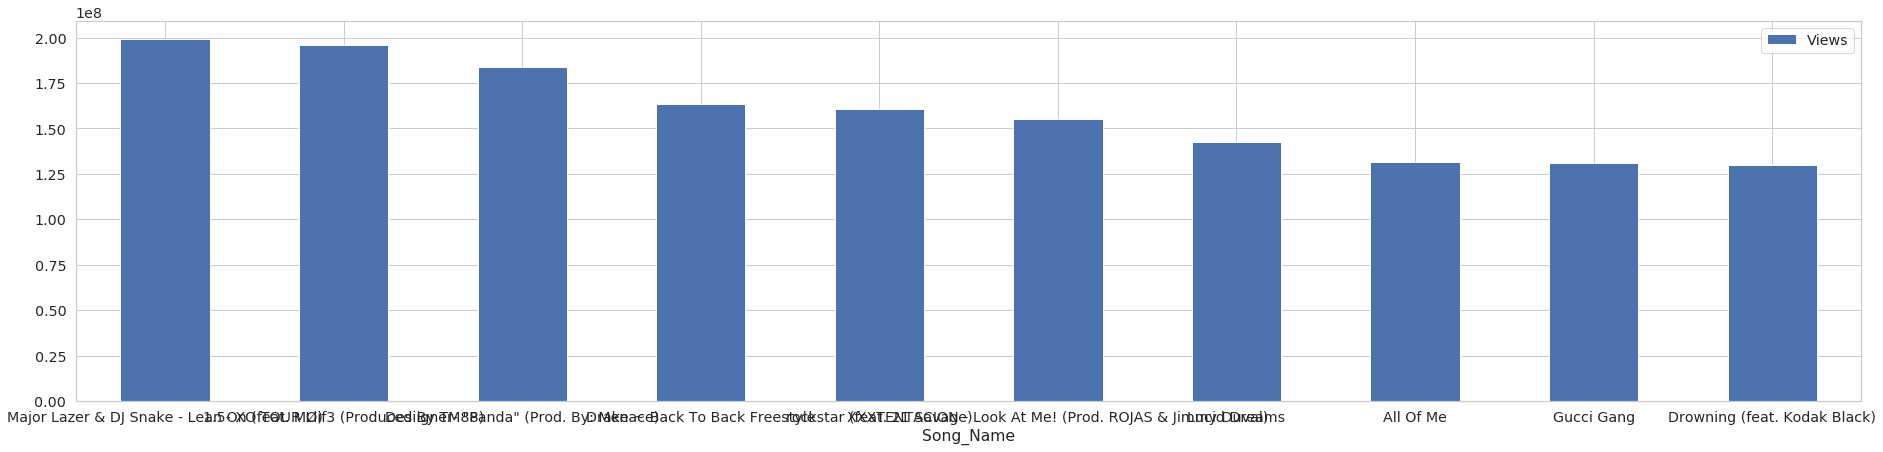

In [0]:
df = pd.DataFrame(
	{
    'Views':df_views_songs.groupby('Song_Name')['Views'].sum().sort_values(ascending=False).head(10)
	}
	) 
df.plot.bar(rot=0,figsize=(32, 7))

### 3. Top 10 genre with most views

In [0]:
df_views_songs.groupby('Genre')['Views'].sum().sort_values(ascending=False).head(10)

Genre
all-music     2.519053e+10
danceedm      6.036237e+09
rbsoul        3.297552e+09
electronic    3.183184e+09
trap          1.120763e+09
latin         1.078477e+09
pop           6.447727e+08
rock          5.300611e+08
ambient       3.375537e+08
classical     3.015770e+08
Name: Views, dtype: float64

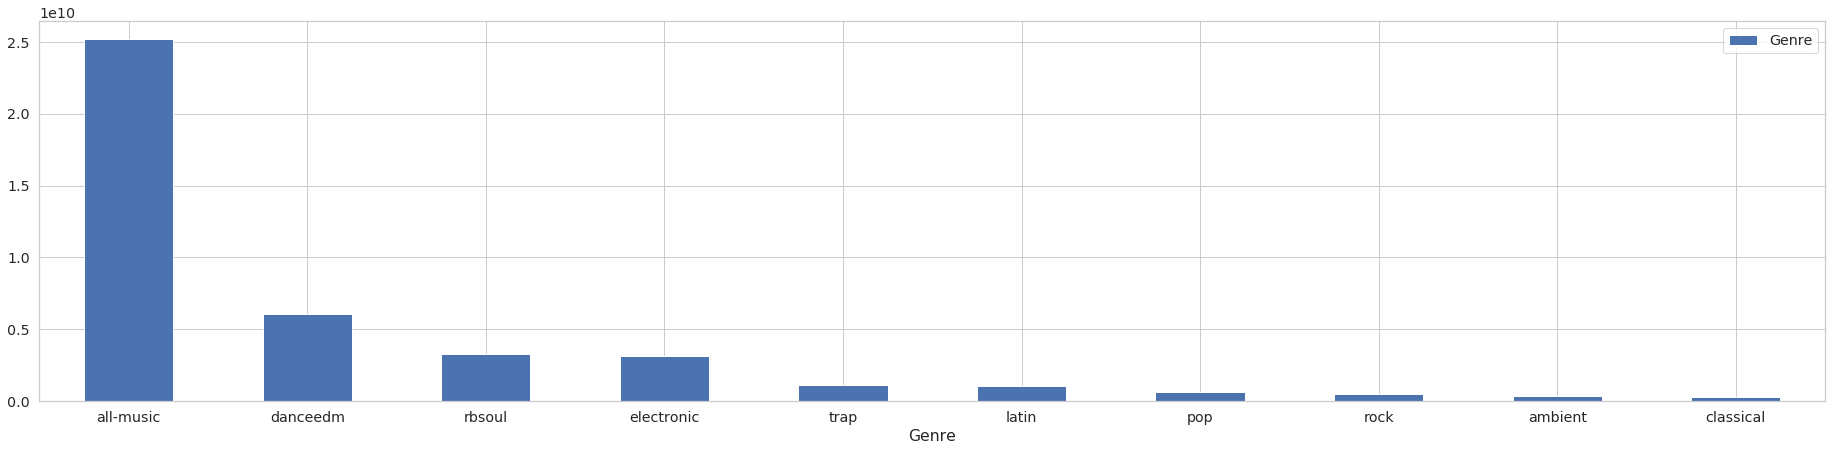

In [0]:
df = pd.DataFrame(
	{
    'Genre':df_views_songs.groupby('Genre')['Views'].sum().sort_values(ascending=False).head(10)
	}
	) 
df.plot.bar(rot=0,figsize=(32, 7))

In [0]:
df_views_songs.columns

Index(['Comments', 'Followers', 'Genre', 'Is_Test_Data', 'Likes', 'Name',
       'Song_Name', 'Timestamp', 'Views'],
      dtype='object')

 <a id=section5></a>
# 5. Data preparation for model building

 <a id=section501></a>
## 5.1 Dummification / One-Hot Encoding of categorical variables

In [0]:
# lets look at how many unique labels each category has
for i in range(0, len(categorical_columns)):
  print(categorical_columns[i], " - ", df_views_songs[categorical_columns[i]].nunique())

Genre  -  21
Name  -  1219
Song_Name  -  98072


**Observations:**
 
As we have lots of categories in one column,

Can we apply below thesis results?

http://proceedings.mlr.press/v7/niculescu09/niculescu09.pdf


**Summary:**

<img src="./images/one-hot-encoding.png" height='200px' width='100%'><br/>

In [0]:
for col in categorical_columns:
    imp_labels = list(df_views_songs[col].value_counts().head(10).index)
    
    for label in imp_labels:
        df_views_songs[col+'_'+label] = np.where(df_views_songs[col] == label, 1, 0)
    
    df_views_songs.drop(col, axis = 1, inplace=True)
    
df_views_songs.head()

,Comments,Followers,Is_Test_Data,Likes,Timestamp,Views,Genre_danceedm,Genre_electronic,Genre_all-music,Genre_rbsoul,Genre_latin,Genre_trap,Genre_rock,Genre_deephouse,Genre_pop,Genre_dubstep,Name_Mixmag,Name_Monstercat,Name_GR6 EXPLODE,Name_Hardstyle,Name_Sweet Musique,Name_officialb2s,Name_trndmsk,Name_Uptempo HC Channel,Name_Resident Advisor,Name_LEGENDA FUNK,Song_Name_! ARRIBA NUEVO LEON ! [ Norteño Quick Mix ] DROPS 2018,Song_Name_Alpha² & Villain - Recharged,Song_Name_BIS Radio Show #753 with Gerd Janson,Song_Name_HIP HOP MIX VOL. 12 - DJ NP,Song_Name_Zoo Brazil - Across My Heart **PREVIEW SNIPPET**,Song_Name_Alison Wonderland & M-Phazes - Messiah (Crankdat Re-Crank) ⚙,Song_Name_trndmsk Future Stars #9: Kyodai - Furōto,Song_Name_Realized,Song_Name_Yves Tumor - Perdition (PAN 73),Song_Name_Pacificadores - Tô de Boa ♪ ♫
Unique_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
413890,4,119563,0,499,2018-03-30 15:24:45,14017.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
249453,17,2141,0,49,2016-06-20 05:58:52,1918.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
681116,11,22248,0,312,2015-05-08 17:45:59,9668.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
387253,2,393655,0,2400,2017-06-08 23:50:03,113036.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1428029,81,201030,0,3031,2016-09-17 20:50:19,110024.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**Observations:**

We have 36* columns after one-hot encoding

In [0]:
feature_cols = list(df_views_songs.columns)

for col in continuous_columns:
    if col in feature_cols:
        feature_cols.remove(col)

# let's remove Timestamp from prediction
feature_cols.remove('Timestamp')

feature_cols.remove('Views')

categorical_columns = feature_cols

print('continuous_columns length : {} '.format(len(continuous_columns)))
print('categorical_columns length : {}'.format(len(categorical_columns)))

continuous_columns length : 4 
categorical_columns length : 30


 <a id=section502></a>
 ## 5.2 Standardizing continuous variables

In [0]:
continuous_columns

['Comments', 'Followers', 'Is_Test_Data', 'Likes']

In [0]:
from sklearn.preprocessing import StandardScaler

continuous_columns.remove('Is_Test_Data')
# standardizing of data
scaler = StandardScaler().fit(df_views_songs[continuous_columns])
data = scaler.transform(df_views_songs[continuous_columns])

In [0]:
# forming dataframe after standardization
df_views_songs_sd= pd.DataFrame(data)
df_views_songs_sd.columns = continuous_columns
df_views_songs_sd.index = df_views_songs.index
print(df_views_songs_sd.shape)

(98073, 3)


#### Merging all columns together.

In [0]:
# merge ctegorical and continuos columns
df_views_songs_sd = pd.concat([df_views_songs_sd, df_views_songs[categorical_columns]],axis=1).reindex(df_views_songs.index)
df_views_songs_sd.shape

(98073, 33)

In [0]:
# add Is_Test_Data column
df_views_songs_sd = pd.concat([df_views_songs_sd, df_views_songs['Is_Test_Data']],axis=1).reindex(df_views_songs.index)

df_views_songs_sd.shape

(98073, 34)

In [0]:
# add Views column
df_views_songs_sd = pd.concat([df_views_songs_sd, df_views_songs['Views']],axis=1).reindex(df_views_songs.index)
df_views_songs_sd.shape

(98073, 35)

 <a id=section6></a>
 # 6. Ensemble Modelling and Prediction
 
 Ensemble modeling is a process where multiple diverse models are created to predict an outcome, either by using many different modeling algorithms or using different training data sets. The ensemble model then aggregates the prediction of each base model and results in once final prediction for the unseen data.

 <a id=section601></a>
 ## 6.1 Linear Regression
 
 
Linear regression is a basic and commonly used type of predictive analysis.  The overall idea of regression is to examine two things: 

1. Does a set of predictor variables do a good job in predicting an outcome (dependent) variable?  
2. Which variables in particular are significant predictors of the outcome variable, and in what way do they–indicated by the magnitude and sign of the beta estimates–impact the outcome variable?  

These regression estimates are used to explain the relationship between one dependent variable and one or more independent variables.  The simplest form of the regression equation with one dependent and one independent variable is defined by the formula y = c + b*x, where y = estimated dependent variable score, c = constant, b = regression coefficient, and x = score on the independent variable.


 <a id=section60101></a>
### 6.1.1  Checking assumptions of Linear Regression

#### a. Independant variables shouldn't be correlated

**NOTE:**

Above assumption is taken care in [Remove highly correlated columns](#section403). Moving forward.

#### b.  Independant variables and target variable should have linear relation

In [0]:
continuous_columns

['Comments', 'Followers', 'Likes']

In [0]:
feature_cols = continuous_columns

In [0]:
cols_to_drop = list()

# iterating through feature columns and collecting all columns 
# who have less than 0.1 correlation with target variable
for i in range(0, len(feature_cols)):
    corr_matrix = df_views_songs_sd[['Views', feature_cols[i]]].corr().abs()
    if(corr_matrix.iloc[0][1] < 0.1):
        cols_to_drop.append(feature_cols[i])

#dropping all uncorrelated columns
df_views_songs_sd.drop(cols_to_drop, axis = 1, inplace=True)
df_views_songs_sd.shape

(98073, 34)

**NOTE:**

Dropped all columns who have less than **0.1 correlation** with target variable.

#### c. Target variable should be normally distributed


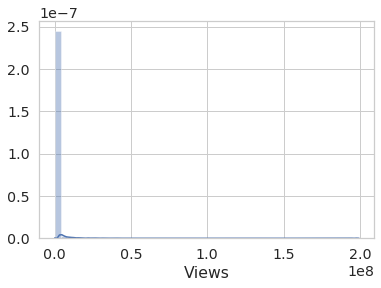

In [0]:
views = df_views_songs_sd[df_views_songs_sd['Is_Test_Data'] == 0]['Views']
sns.distplot(views, color="b")

**Observations**

1. We observe target variable i.e; **Views** is not normally distributed
2. Lets apply different transformation and check.

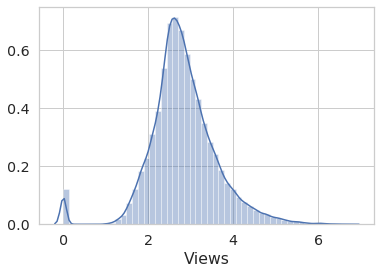

In [0]:
views_trans = views.apply(lambda x : x**(1/10))
sns.distplot(views_trans, color="b")

**Observations:** Current transformation has made it little better. Let's continue.

In [0]:
views_trans = pd.DataFrame({'Views':views_trans})

NOTE:

Let's assign newly transformed 'Views' column after train test split.

 <a id=section60102></a>
 ### 6.1.2 Segregating Train and Test data

In [0]:
df_views_songs_train = df_views_songs_sd[df_views_songs_sd['Is_Test_Data'] == 0]
df_views_songs_test = df_views_songs_sd[df_views_songs_sd['Is_Test_Data'] == 1]

In [0]:
# dropping Is_Test_Data column
 df_views_songs_train.drop('Is_Test_Data', axis=1, inplace=True)
 df_views_songs_test.drop('Is_Test_Data', axis=1, inplace=True)

In [0]:
print(df_views_songs_train.shape)
print(df_views_songs_test.shape)

(78458, 33)
(19615, 33)


In [0]:
feature_cols = list(df_views_songs_train.columns)
feature_cols.remove('Views')
feature_cols

In [0]:
 X = df_views_songs_train[feature_cols]
 y = df_views_songs_train['Views']

##### Splitting train data again into train and test data


In [0]:
from sklearn.model_selection import train_test_split

def split(X,y):
    return train_test_split(X, y, test_size=0.30, random_state=1)

In [0]:
X_train_lr, X_test_lr, y_train_lr, y_test_lr=split(X,y)
print('Train cases as below')
print('X_train shape: ',X_train_lr.shape)
print('y_train shape: ',y_train_lr.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test_lr.shape)
print('y_test shape: ',y_test_lr.shape)

Train cases as below
X_train shape:  (54920, 32)
y_train shape:  (54920,)

Test cases as below
X_test shape:  (23538, 32)
y_test shape:  (23538,)


##### Defining Linear Regression function for modelling

In [0]:
def rmse_scorer(y_actual, y_predicted) :
  from sklearn.metrics import mean_squared_error
  from math import sqrt

  rmse = sqrt(mean_squared_error(y_actual, y_predicted))
  return rmse

In [0]:
from sklearn.metrics import make_scorer
my_scorer = make_scorer(rmse_scorer, greater_is_better=False)

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

def linear_reg(gridsearch = False):
    linreg = LinearRegression() 
    if not(gridsearch):
        parameters = {'normalize':[True,False], 'copy_X':[True, False] }
        linreg = RandomizedSearchCV(linreg,parameters, cv = 10,refit = True , scoring = my_scorer)                                                    
        return linreg
    else:
        parameters = {'normalize':[True,False], 'copy_X':[True, False]}
        linreg = GridSearchCV(linreg,parameters, cv = 10,refit = True , scoring= my_scorer)                                                    
        return linreg

 <a id=section60102></a>
### 6.1.2 Using Default Model

 <a id=section6010201></a>
#### 6.1.2.1 Building Model and Prediction

In [0]:
linreg = LinearRegression()
linreg.fit(X_train_lr,y_train_lr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# print the intercept and coefficients
print('Intercept:',linreg.intercept_)
print('Coefficients:',linreg.coef_)  

Intercept: 491173.70742046187
Coefficients: [ 3.63658463e+06  8.14511989e+04 -2.25634399e+05 -2.55978535e+05
  1.19046948e+06  5.24303745e+05  2.93309023e+05 -9.17647182e+04
  8.11713913e+04 -1.05397983e+05  1.68372306e+04 -3.99433388e+05
  1.35977789e+05 -4.24987462e+05 -2.69540642e+05  3.03636573e+05
 -1.34473954e+05  2.66473973e+05  9.44371056e+03  3.56904119e+05
 -3.22321513e+04 -2.03973620e+05 -2.14204175e+06  5.06791583e+03
 -5.82076609e-11 -2.32830644e-10  4.65661287e-10  0.00000000e+00
 -3.09365564e+03 -1.10797895e+06  3.52980591e+05  0.00000000e+00]


In [0]:
 # make predictions on the training set
y_pred_train_lr = linreg.predict(X_train_lr) 

In [0]:
 # make predictions on the testing set
y_pred_test_lr = linreg.predict(X_test_lr)  

In [0]:
RMSE_MAP = {}

 <a id=section6010202></a>
#### 6.1.2.2 Model Evaluation

#### a. RMSE


In [0]:
from sklearn import metrics
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train_lr, y_pred_train_lr))
print('RMSE for training set is {}'.format(RMSE_train))
RMSE_MAP['lr_train_d'] = RMSE_train

RMSE_test = np.sqrt( metrics.mean_squared_error(y_test_lr, y_pred_test_lr))
print('RMSE for testing set is {}'.format(RMSE_test))
RMSE_MAP['lr_test_d'] = RMSE_test

RMSE for training set is 2501622.756793326
RMSE for testing set is 3762343.023659728


#### b. MAPE


In [0]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [0]:
mape_train_error = mean_absolute_percentage_error(y_train_lr, y_pred_train_lr)
mape_test_error = mean_absolute_percentage_error(y_test_lr, y_pred_test_lr)
print('MAPE for training set is {}'.format(mape_train_error))
print('MAPE for testing set is {}'.format(mape_test_error))

MAPE for training set is inf
MAPE for testing set is inf


#### c. R-Squared Error

In [0]:
from sklearn.metrics import r2_score

r_squared_train_lr = r2_score(y_train_lr,y_pred_train_lr )
print('R-Squared for training set is {}'.format(r_squared_train_lr))

R-Squared for training set is 0.5933754021223858


In [0]:
r_squared_test_lr = r2_score(y_test_lr,y_pred_test_lr )
print('R-Squared for testing set is {}'.format(r_squared_test_lr))

R-Squared for testing set is 0.013545836301295688


#### d. Adjusted R-Squared Error

In [0]:
adjusted_r_squared_train_lr = 1 - (1-r_squared_train_lr)*(len(y_train_lr)-1)/(len(y_train_lr)-X_train_lr.shape[1]-1)
print('Adjusted R-Squared for training set is {}'.format(adjusted_r_squared_train_lr))

Adjusted R-Squared for training set is 0.5931383334698437


In [0]:
adjusted_r_squared_test_lr = 1 - (1-r_squared_test_lr)*(len(y_test_lr)-1)/(len(y_test_lr)-X_test_lr.shape[1]-1)
print('Adjusted R-Squared for testing set is {}'.format(adjusted_r_squared_test_lr))

Adjusted R-Squared for testing set is 0.012202865306258026


 <a id=section60103></a>
### 6.1.3 Using GridSearchCV

 <a id=section6010301></a>
#### 6.1.3.1 Building Model and Prediction

In [0]:
linreg_gs = linear_reg(True)
linreg_gs.fit(X_train_lr,y_train_lr)

GridSearchCV(cv=10, error_score=nan,
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='deprecated', n_jobs=None,
             param_grid={'copy_X': [True, False], 'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(rmse_scorer, greater_is_better=False),
             verbose=0)

In [0]:
print("best_params after cross-validation : ", linreg_gs.best_params_)   

best_params after cross-validation :  {'copy_X': True, 'normalize': True}


In [0]:
 # make predictions on the training set
y_pred_train_lr_gs = linreg_gs.predict(X_train_lr) 

In [0]:
 # make predictions on the testing set
y_pred_test_lr_gs = linreg_gs.predict(X_test_lr)  

 <a id=section6010302></a>
#### 6.1.3.2 Model Evaluation

#### a. RMSE


In [0]:
from sklearn import metrics
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train_lr, y_pred_train_lr_gs))
print('RMSE for training set is {}'.format(RMSE_train))
RMSE_MAP['lr_train_gs'] = RMSE_train

RMSE_test = np.sqrt( metrics.mean_squared_error(y_test_lr, y_pred_test_lr_gs))
print('RMSE for testing set is {}'.format(RMSE_test))
RMSE_MAP['lr_test_gs'] = RMSE_test

RMSE for training set is 2501622.7567933267
RMSE for testing set is 3762343.023659724


#### b. MAPE


In [0]:
mape_train_error = mean_absolute_percentage_error(y_train_lr, y_pred_train_lr_gs)
mape_test_error = mean_absolute_percentage_error(y_test_lr, y_pred_test_lr_gs)
print('MAPE for training set is {}'.format(mape_train_error))
print('MAPE for testing set is {}'.format(mape_test_error))

MAPE for training set is inf
MAPE for testing set is inf


#### c. R-Squared Error

In [0]:
from sklearn.metrics import r2_score

r_squared_train_lr_gs = r2_score(y_train_lr,y_pred_train_lr_gs )
print('R-Squared for training set is {}'.format(r_squared_train_lr_gs))

R-Squared for training set is 0.5933754021223856


In [0]:
r_squared_test_lr_gs = r2_score(y_test_lr,y_pred_test_lr_gs )
print('R-Squared for testing set is {}'.format(r_squared_test_lr_gs))

R-Squared for testing set is 0.013545836301297909


#### d. Adjusted R-Squared Error

In [0]:
adjusted_r_squared_train_lr_gs = 1 - (1-r_squared_train_lr_gs)*(len(y_train_lr)-1)/(len(y_train_lr)-X_train_lr.shape[1]-1)
print('Adjusted R-Squared for training set is {}'.format(adjusted_r_squared_train_lr_gs))

Adjusted R-Squared for training set is 0.5931383334698435


In [0]:
adjusted_r_squared_test_lr_gs = 1 - (1-r_squared_test_lr_gs)*(len(y_test_lr)-1)/(len(y_test_lr)-X_test_lr.shape[1]-1)
print('Adjusted R-Squared for testing set is {}'.format(adjusted_r_squared_test_lr_gs))

Adjusted R-Squared for testing set is 0.012202865306260358


 <a id=section60104></a>
### 6.1.4 Using RandomSearchCV

 <a id=section6010401></a>
#### 6.1.4.1 Building Model and Prediction

In [0]:
linreg_rs = linear_reg(False)
linreg_rs.fit(X_train_lr,y_train_lr)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                              n_jobs=None, normalize=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'copy_X': [True, False],
                                        'normalize': [True, False]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False,
                   scoring=make_scorer(rmse_scorer, greater_is_better=False),
                   verbose=0)

In [0]:
print("best_params after cross-validation : ", linreg_rs.best_params_)   

best_params after cross-validation :  {'normalize': True, 'copy_X': True}


In [0]:
 # make predictions on the training set
y_pred_train_lr_rs = linreg_rs.predict(X_train_lr) 

In [0]:
 # make predictions on the testing set
y_pred_test_lr_rs = linreg_rs.predict(X_test_lr)  

 <a id=section6010402></a>
#### 6.1.4.2 Model Evaluation

#### a. RMSE


In [0]:
from sklearn import metrics
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train_lr, y_pred_train_lr_rs))
print('RMSE for training set is {}'.format(RMSE_train))
RMSE_MAP['lr_train_rs'] = RMSE_train

RMSE_test = np.sqrt( metrics.mean_squared_error(y_test_lr, y_pred_test_lr_rs))
print('RMSE for testing set is {}'.format(RMSE_test))
RMSE_MAP['lr_test_rs'] = RMSE_test

RMSE for training set is 2501622.7567933267
RMSE for testing set is 3762343.023659724


#### b. MAPE


In [0]:
mape_train_error = mean_absolute_percentage_error(y_train_lr, y_pred_train_lr_rs)
mape_test_error = mean_absolute_percentage_error(y_test_lr, y_pred_test_lr_rs)
print('MAPE for training set is {}'.format(mape_train_error))
print('MAPE for testing set is {}'.format(mape_test_error))

MAPE for training set is inf
MAPE for testing set is inf


#### c. R-Squared Error

In [0]:
from sklearn.metrics import r2_score

r_squared_train_lr_rs = r2_score(y_train_lr,y_pred_train_lr_rs )
print('R-Squared for training set is {}'.format(r_squared_train_lr_rs))

R-Squared for training set is 0.5933754021223856


In [0]:
r_squared_test_lr_rs = r2_score(y_test_lr,y_pred_test_lr_rs )
print('R-Squared for testing set is {}'.format(r_squared_test_lr_rs))

R-Squared for testing set is 0.013545836301297909


#### d. Adjusted R-Squared Error

In [0]:
adjusted_r_squared_train_lr_rs = 1 - (1-r_squared_train_lr_rs)*(len(y_train_lr)-1)/(len(y_train_lr)-X_train_lr.shape[1]-1)
print('Adjusted R-Squared for training set is {}'.format(adjusted_r_squared_train_lr_rs))

Adjusted R-Squared for training set is 0.5931383334698435


In [0]:
adjusted_r_squared_test_lr_rs = 1 - (1-r_squared_test_lr_rs)*(len(y_test_lr)-1)/(len(y_test_lr)-X_test_lr.shape[1]-1)
print('Adjusted R-Squared for testing set is {}'.format(adjusted_r_squared_test_lr_rs))

Adjusted R-Squared for testing set is 0.012202865306260358


 <a id=section602></a>
## 6.2 Decision Tree

 <a id=section60201></a>
### 6.2.1 Using Default Model

##### Splitting train and test data


In [0]:
X_train_dt, X_test_dt, y_train_dt, y_test_dt=split(X,y)
print('Train cases as below')
print('X_train shape: ',X_train_dt.shape)
print('y_train shape: ',y_train_dt.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test_dt.shape)
print('y_test shape: ',y_test_dt.shape)

Train cases as below
X_train shape:  (54920, 32)
y_train shape:  (54920,)

Test cases as below
X_test shape:  (23538, 32)
y_test shape:  (23538,)


 <a id=section6020101></a>
#### 6.2.1.1 Building Model and Prediction

In [0]:
from sklearn.tree import DecisionTreeRegressor

# using default model for building 
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train_dt, y_train_dt)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [0]:
#prediction on training data
y_pred_train_dt = dt_reg.predict(X_train_dt)

#prediction on testing data
y_pred_test_dt = dt_reg.predict(X_test_dt)

<a id=section6020102></a>
#### 6.2.1.2 Model Evaluation

#### a. RMSE


In [0]:
RMSE_train_dt = np.sqrt( metrics.mean_squared_error(y_train_dt, y_pred_train_dt))
print('RMSE for training set is {}'.format(RMSE_train_dt))
RMSE_MAP['dt_train_d'] = RMSE_train_dt

RMSE_test_dt = np.sqrt( metrics.mean_squared_error(y_test_dt, y_pred_test_dt))
print('RMSE for testing set is {}'.format(RMSE_test_dt))
RMSE_MAP['dt_test_d'] = RMSE_test_dt

RMSE for training set is 129676.21851832513
RMSE for testing set is 2894203.44790235


#### b. MAPE


In [0]:
mape_train_error = mean_absolute_percentage_error(y_train_dt, y_pred_train_dt)
mape_test_error = mean_absolute_percentage_error(y_test_dt, y_pred_test_dt)
print('MAPE for training set is {}'.format(mape_train_error))
print('MAPE for testing set is {}'.format(mape_test_error))

MAPE for training set is nan
MAPE for testing set is nan


#### c. R-Squared Error

In [0]:
r_squared_train_dt = r2_score(y_train_dt,y_pred_train_dt )
print('R-Squared for training set is {}'.format(r_squared_train_dt))

R-Squared for training set is 0.9989073761300375


In [0]:
r_squared_test_dt = r2_score(y_test_dt,y_pred_test_dt )
print('R-Squared for testing set is {}'.format(r_squared_test_dt))

R-Squared for testing set is 0.416261623937242


#### d. Adjusted R-Squared Error

In [0]:
adjusted_r_squared_train_dt = 1 - (1-r_squared_train_dt)*(len(y_train_dt)-1)/(len(y_train_dt)-X_train_dt.shape[1]-1)
print('Adjusted R-Squared for training set is {}'.format(adjusted_r_squared_train_dt))

Adjusted R-Squared for training set is 0.9989067391128233


In [0]:
adjusted_r_squared_test_dt = 1 - (1-r_squared_test_dt)*(len(y_test_dt)-1)/(len(y_test_dt)-X_train_dt.shape[1]-1)
print('Adjusted R-Squared for testing set is {}'.format(adjusted_r_squared_test_dt))

Adjusted R-Squared for testing set is 0.4154669152355186


 <a id=section60202></a>
### 6.2.2 Using GridSearchCV

 <a id=section6020201></a>
#### 6.2.2.1 Building Model and Prediction

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
param_grid = {
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
               
}

In [0]:
# Instantiate the grid search model
dt_reg_gs = GridSearchCV(estimator = dt_reg, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, scoring = my_scorer, verbose = 2)

In [0]:
dt_reg_gs.fit(X_train_dt, y_train_dt)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:   25.7s
[Parallel(n_jobs=-1)]: Done 648 out of 648 | elapsed:  1.0min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100,
                                       110, None],
                         '

In [0]:
#prediction on training data
y_pred_train_dt_gs = dt_reg_gs.predict(X_train_dt)

#prediction on testing data
y_pred_test_dt_gs = dt_reg_gs.predict(X_test_dt)

<a id=section6020202></a>
#### 6.2.2.2 Model Evaluation

#### a. RMSE


In [0]:
RMSE_train_dt_gs = np.sqrt( metrics.mean_squared_error(y_train_dt, y_pred_train_dt_gs))
print('RMSE for training set is {}'.format(RMSE_train_dt_gs))
RMSE_MAP['dt_train_gs'] = RMSE_train_dt_gs

RMSE_test_dt_gs = np.sqrt( metrics.mean_squared_error(y_test_dt, y_pred_test_dt_gs))
print('RMSE for testing set is {}'.format(RMSE_test_dt_gs))
RMSE_MAP['dt_test_gs'] = RMSE_test_dt_gs

RMSE for training set is 1810722.3350111088
RMSE for testing set is 2860718.3055057875


#### b. MAPE


In [0]:
mape_train_error = mean_absolute_percentage_error(y_train_dt, y_pred_train_dt_gs)
mape_test_error = mean_absolute_percentage_error(y_test_dt, y_pred_test_dt_gs)
print('MAPE for training set is {}'.format(mape_train_error))
print('MAPE for testing set is {}'.format(mape_test_error))

MAPE for training set is inf
MAPE for testing set is inf


#### c. R-Squared Error

In [0]:
r_squared_train_dt_gs = r2_score(y_train_dt,y_pred_train_dt_gs )
print('R-Squared for training set is {}'.format(r_squared_train_dt_gs))

R-Squared for training set is 0.7869636434011292


In [0]:
r_squared_test_dt_gs = r2_score(y_test_dt,y_pred_test_dt_gs )
print('R-Squared for testing set is {}'.format(r_squared_test_dt_gs))

R-Squared for testing set is 0.42969087229692027


#### d. Adjusted R-Squared Error

In [0]:
adjusted_r_squared_train_dt_gs = 1 - (1-r_squared_train_dt_gs)*(len(y_train_dt)-1)/(len(y_train_dt)-X_train_dt.shape[1]-1)
print('Adjusted R-Squared for training set is {}'.format(adjusted_r_squared_train_dt_gs))

Adjusted R-Squared for training set is 0.7868394397935142


In [0]:
adjusted_r_squared_test_dt_gs = 1 - (1-r_squared_test_dt_gs)*(len(y_test_dt)-1)/(len(y_test_dt)-X_train_dt.shape[1]-1)
print('Adjusted R-Squared for testing set is {}'.format(adjusted_r_squared_test_dt_gs))

Adjusted R-Squared for testing set is 0.42891444634131515


 <a id=section60203></a>
### 6.2.3 Using RandomizedSearchCV

 <a id=section6020301></a>
#### 6.2.3.1 Building Model and Prediction

In [0]:
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]


# Create the random grid
random_grid = {
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
               
}


In [0]:
# Instantiate the random search model
dt_reg_rs = RandomizedSearchCV(estimator = dt_reg, param_distributions = random_grid, n_iter = 100, cv = 3, 
                               verbose=2, random_state=42, scoring = my_scorer, n_jobs = -1)

In [0]:
dt_reg_rs.fit(X_train_dt, y_train_dt)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   29.3s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   presort='deprecated',
                                                   random_state=None,
                                                   splitter='best'),
                   iid='d

In [0]:
#prediction on training data
y_pred_train_dt_rs = dt_reg_rs.predict(X_train_dt)

#prediction on testing data
y_pred_test_dt_rs = dt_reg_rs.predict(X_test_dt)

<a id=section6020302></a>
#### 6.2.3.2 Model Evaluation

#### a. RMSE


In [0]:
RMSE_train_dt_rs = np.sqrt( metrics.mean_squared_error(y_train_dt, y_pred_train_dt_rs))
print('RMSE for training set is {}'.format(RMSE_train_dt_rs))
RMSE_MAP['dt_train_rs'] = RMSE_train_dt_rs

RMSE_test_dt_gs = np.sqrt( metrics.mean_squared_error(y_test_dt, y_pred_test_dt_rs))
print('RMSE for testing set is {}'.format(RMSE_test_dt_gs))
RMSE_MAP['dt_test_rs'] = RMSE_test_dt_gs


RMSE for training set is 1273302.704932997
RMSE for testing set is 2688170.9943080093


#### b. MAPE


In [0]:
mape_train_error = mean_absolute_percentage_error(y_train_dt, y_pred_train_dt_rs)
mape_test_error = mean_absolute_percentage_error(y_test_dt, y_pred_test_dt_rs)
print('MAPE for training set is {}'.format(mape_train_error))
print('MAPE for testing set is {}'.format(mape_test_error))

MAPE for training set is nan
MAPE for testing set is nan


#### c. R-Squared Error

In [0]:
r_squared_train_dt_rs = r2_score(y_train_dt,y_pred_train_dt_rs )
print('R-Squared for training set is {}'.format(r_squared_train_dt_rs))

R-Squared for training set is 0.8946551443811994


In [0]:
r_squared_test_dt_rs = r2_score(y_test_dt,y_pred_test_dt_rs )
print('R-Squared for testing set is {}'.format(r_squared_test_dt_rs))

R-Squared for testing set is 0.4964136916905322


#### d. Adjusted R-Squared Error

In [0]:
adjusted_r_squared_train_dt_gs = 1 - (1-r_squared_train_dt_gs)*(len(y_train_dt)-1)/(len(y_train_dt)-X_train_dt.shape[1]-1)
print('Adjusted R-Squared for training set is {}'.format(adjusted_r_squared_train_dt_gs))

Adjusted R-Squared for training set is 0.7868394397935142


In [0]:
adjusted_r_squared_test_dt_gs = 1 - (1-r_squared_test_dt_gs)*(len(y_test_dt)-1)/(len(y_test_dt)-X_train_dt.shape[1]-1)
print('Adjusted R-Squared for testing set is {}'.format(adjusted_r_squared_test_dt_gs))

Adjusted R-Squared for testing set is 0.42891444634131515


In [0]:
RMSE_MAP

{'dt_test_d': 2894203.44790235,
 'dt_test_gs': 2860718.3055057875,
 'dt_test_rs': 2688170.9943080093,
 'dt_train_d': 129676.21851832513,
 'dt_train_gs': 1810722.3350111088,
 'dt_train_rs': 1273302.704932997,
 'lr_test_d': 3762343.023659728,
 'lr_test_gs': 3762343.023659724,
 'lr_test_rs': 3762343.023659724,
 'lr_train_d': 2501622.756793326,
 'lr_train_gs': 2501622.7567933267,
 'lr_train_rs': 2501622.7567933267}

 <a id=section603></a>
## 6.3 Random Forest

##### Splitting train and test data


In [0]:
X_train_rf, X_test_rf, y_train_rf, y_test_rf=split(X,y)
print('Train cases as below')
print('X_train shape: ',X_train_rf.shape)
print('y_train shape: ',y_train_rf.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test_rf.shape)
print('y_test shape: ',y_test_rf.shape)

Train cases as below
X_train shape:  (54920, 32)
y_train shape:  (54920,)

Test cases as below
X_test shape:  (23538, 32)
y_test shape:  (23538,)


 <a id=section60301></a>

#### 6.3.1 Using Default Model


 <a id=section6030101></a>

#### 6.3.1.1 Building Model and Prediction

In [0]:
from sklearn.ensemble import RandomForestRegressor

# using default model for building
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train_rf, y_train_rf)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [0]:
y_pred_train_rf = rf_reg.predict(X_train_rf)
y_pred_test_rf = rf_reg.predict(X_test_rf)

 <a id=section6030102></a>

### 6.3.1.2 Model Evaluation

##### a. RMSE


In [0]:
from sklearn import metrics
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train_rf, y_pred_train_rf))
print('RMSE for training set is {}'.format(RMSE_train))
RMSE_MAP['rf_train_d'] = RMSE_train

RMSE_test = np.sqrt( metrics.mean_squared_error(y_test_rf, y_pred_test_rf))
print('RMSE for testing set is {}'.format(RMSE_test))
RMSE_MAP['rf_test_d'] = RMSE_test


RMSE for training set is 827232.4367303494
RMSE for testing set is 2087675.4319342622


##### b. MAPE


In [0]:
mape_train_error = mean_absolute_percentage_error(y_train_rf, y_pred_train_rf)
mape_test_error = mean_absolute_percentage_error(y_test_rf, y_pred_test_rf)
print('MAPE for training set is {}'.format(mape_train_error))
print('MAPE for testing set is {}'.format(mape_test_error))

MAPE for training set is nan
MAPE for testing set is nan


##### c. R-Squared Error

In [0]:
r_squared_train_rf = r2_score(y_train_rf,y_pred_train_rf )
print('R-Squared for training set is {}'.format(r_squared_train_rf))

R-Squared for training set is 0.955536349120837


In [0]:
r_squared_test_rf = r2_score(y_test_rf,y_pred_test_rf )
print('R-Squared for testing set is {}'.format(r_squared_test_rf))

R-Squared for testing set is 0.6962711167993818


##### d. Adjusted R-Squared Error

In [0]:
adjusted_r_squared_train_rf = 1 - (1-r_squared_train_rf)*(len(y_train_rf)-1)/(len(y_train_rf)-X_train_rf.shape[1]-1)
print('Adjusted R-Squared for training set is {}'.format(adjusted_r_squared_train_rf))

Adjusted R-Squared for training set is 0.9555104261003015


In [0]:
adjusted_r_squared_test_rf = 1 - (1-r_squared_test_rf)*(len(y_test_rf)-1)/(len(y_test_rf)-X_train_rf.shape[1]-1)
print('Adjusted R-Squared for testing set is {}'.format(adjusted_r_squared_test_rf))

Adjusted R-Squared for testing set is 0.6958576165116805


 <a id=section60302></a>
### 6.3.2 Using GridSearchCV

 <a id=section6030201></a>
#### 6.3.2.1 Building Model and Prediction

In [0]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
param_grid = {
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'n_estimators' : [1, 5, 10, 15, 20, 25, 30],
               'bootstrap': bootstrap
              }

In [0]:
# Instantiate the grid search model
rf_reg_gs = GridSearchCV(estimator = rf_reg, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2, scoring = my_scorer)

In [0]:
rf_reg_gs.fit(X_train_dt, y_train_dt)

Fitting 3 folds for each of 3024 candidates, totalling 9072 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   24.9s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed: 17.2min
[Parallel(n_jobs=-1)]: Done 1981 tasks      | elapsed: 24.2min
[Parallel(n_jobs=-1)]: Done 2588 tasks      | elapsed: 32.1min
[Parallel(n_jobs=-1)]: Done 3277 tasks      | elapsed: 41.6min
[Parallel(n_jobs=-1)]: Done 4046 tasks      | elapsed: 51.6min
[Parallel(n_jobs=-1)]: Done 4897 tasks      | elapsed: 61.3min
[Parallel(n_jobs=-1)]: Done 5828 tasks      | elapsed: 79.5min
[Parallel(n_jobs=-1)]: Done 6841 tasks      | elapsed: 98.1min
[Parallel(n_jobs=-1)]: Done 7934 tasks      | elapsed: 119.0min
[Parallel(n_jobs=-1)]: Done 9072 out of 9072 

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, rand...
             iid='deprecated', n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         '

In [0]:
#prediction on training data
y_pred_train_rf_gs = rf_reg_gs.predict(X_train_rf)

#prediction on testing data
y_pred_test_rf_gs = rf_reg_gs.predict(X_test_rf)

 <a id=section6030202></a>

#### 6.3.2.2 Model Evaluation

##### a. RMSE


In [0]:
from sklearn import metrics
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train_rf, y_pred_train_rf_gs))
print('RMSE for training set is {}'.format(RMSE_train))
RMSE_MAP['rf_train_gs'] = RMSE_train

RMSE_test = np.sqrt( metrics.mean_squared_error(y_test_rf, y_pred_test_rf_gs))
print('RMSE for testing set is {}'.format(RMSE_test))
RMSE_MAP['rf_test_gs'] = RMSE_test


RMSE for training set is 1190225.1558994672
RMSE for testing set is 2178931.353352303


##### b. R-Squared Error

In [0]:
r_squared_train_rf_gs = r2_score(y_train_rf,y_pred_train_rf_gs )
print('R-Squared for training set is {}'.format(r_squared_train_rf_gs))

R-Squared for training set is 0.9079532923961169


In [0]:
r_squared_test_rf_gs = r2_score(y_test_rf,y_pred_test_rf_gs )
print('R-Squared for testing set is {}'.format(r_squared_test_rf_gs))

R-Squared for testing set is 0.669137742447603


##### c. Adjusted R-Squared Error

In [0]:
adjusted_r_squared_train_rf_gs = 1 - (1-r_squared_train_rf_gs)*(len(y_train_rf)-1)/(len(y_train_rf)-X_train_rf.shape[1]-1)
print('Adjusted R-Squared for training set is {}'.format(adjusted_r_squared_train_rf_gs))

Adjusted R-Squared for training set is 0.9078996276914815


In [0]:
adjusted_r_squared_test_rf_gs = 1 - (1-r_squared_test_rf_gs)*(len(y_test_rf)-1)/(len(y_test_rf)-X_train_rf.shape[1]-1)
print('Adjusted R-Squared for testing set is {}'.format(adjusted_r_squared_test_rf_gs))

Adjusted R-Squared for testing set is 0.66868730244583


 <a id=section60303></a>
### 6.3.3 Using RandomizedSearchCV

 <a id=section6030301></a>
#### 6.3.3.1 Building Model and Prediction

In [0]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'n_estimators' : n_estimators,
               'bootstrap': bootstrap
              }

In [0]:
# Instantiate the grid search model
rf_reg_rs = RandomizedSearchCV(estimator = rf_reg, param_distributions = random_grid, n_iter = 100, cv = 3, 
                               verbose=2, random_state=42, n_jobs = -1, scoring = my_scorer)

In [0]:
rf_reg_rs.fit(X_train_dt, y_train_dt)

In [0]:
#prediction on training data
y_pred_train_rf_rs = rf_reg_rs.predict(X_train_rf)

#prediction on testing data
y_pred_test_rf_rs = rf_reg_rs.predict(X_test_rf)

 <a id=section6030202></a>

#### 6.3.2.2 Model Evaluation

##### a. RMSE


In [0]:
from sklearn import metrics
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train_rf, y_pred_train_rf_rs))
print('RMSE for training set is {}'.format(RMSE_train))
RMSE_MAP['rf_train_rs'] = RMSE_train

RMSE_test = np.sqrt( metrics.mean_squared_error(y_test_rf, y_pred_test_rf_rs))
print('RMSE for testing set is {}'.format(RMSE_test))
RMSE_MAP['rf_test_rs'] = RMSE_test


##### b. R-Squared Error

In [0]:
r_squared_train_rf_rs = r2_score(y_train_rf,y_pred_train_rf_rs )
print('R-Squared for training set is {}'.format(r_squared_train_rf_rs))

In [0]:
r_squared_test_rf_rs = r2_score(y_test_rf,y_pred_test_rf_rs )
print('R-Squared for testing set is {}'.format(r_squared_test_rf_rs))

##### c. Adjusted R-Squared Error

In [0]:
adjusted_r_squared_train_rf_rs = 1 - (1-r_squared_train_rf_rs)*(len(y_train_rf)-1)/(len(y_train_rf)-X_train_rf.shape[1]-1)
print('Adjusted R-Squared for training set is {}'.format(adjusted_r_squared_train_rf_rs))

In [0]:
adjusted_r_squared_test_rf_rs = 1 - (1-r_squared_test_rf_rs)*(len(y_test_rf)-1)/(len(y_test_rf)-X_train_rf.shape[1]-1)
print('Adjusted R-Squared for testing set is {}'.format(adjusted_r_squared_test_rf_rs))

 <a id=section7></a>

# 7. Conclusion

## 7.1 Choosing Best Model for prediction

 <a id=section701></a>
<img src="./images/ChartBustersResults.png" height='400px' width='100%'><br/>

NOTE:

As we can observe Random Forest algorithm has **best scores in terms of RMSE**. Let's use Tandom Forest GridSearchCV to predict our output.


 <a id=section702></a>
# 7.2 Final Prediction

In [0]:
 # dropping existing Views column
 df_views_songs_test.drop('Views', axis=1, inplace=True)

In [0]:
# predicting test data
y_pred = rf_reg_gs.predict(df_views_songs_test)

In [0]:
# storing predicted output in a dataframe
views_predicted = pd.DataFrame({'Views' : np.array(y_pred)})
views_predicted.index = df_views_songs_test.index

In [0]:
# scaling back to original value
views_predicted.apply(lambda x : x**10)

In [0]:
# storing output in xlsx format
views_predicted.to_excel('Views_Prediction.xlsx')